In [1]:
# drawing utils
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.ticker
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb
# matplotlib.rcParams['text.usetex'] = True

from cycler import cycler


# math utils
import numpy as np

# statistics utils
import pandas as pd

In [2]:
# read data from files

file = '../PT1-2DFluorescence/pt1_no-d_solid_ex200-500_em300-700_scan1200nmps.TXT'

with open(file, 'r', encoding='ascii') as f:
    rdata = f.read()

# rdata = np.loadtxt(file)

rdata = rdata.split('\n')

for line in rdata:
    print(line)

Sample:	'20210319
File name:	pt1_no-d_solid_ex200-500_em300-700_scan1200nmps.FD3
Run date:	'20:40:32, 03/21/2021
Operator:	F-7000
Comment:	'

Instrument
Model:	F-7000 FL Spectrophotometer
Serial number:	2468-004
ROM Version:	5J14000 06

Instrument parameters
Measurement type:	3-D scan
Data mode:	Fluorescence
EX  Start WL:	200.0 nm
EX  End WL:	500.0 nm
EX Sampling interval:	3.0 nm
EM  Start WL:	300.0 nm
EM  End WL:	700.0 nm
EM Sampling interval:	3.0 nm
Scan speed:	1200 nm/min
EX Slit:	2.5 nm
EM Slit:	2.5 nm
PMT Voltage:	700 V
Response:	Auto 
Corrected spectra:	Off
Shutter control:	On
Contour interval:	20.000

Peak integration
Integration method:	Rectangular
Sensitivity:	1
Threshold:	1.000

Peaks
No.	ApexEX/EM(nm)	Height(Data)
1	203.0/321.0	431.3
2	203.0/333.0	369.7
3	203.0/486.0	532.3
4	203.0/684.0	27.41
5	206.0/489.0	504.8
6	206.0/672.0	44.97
7	209.0/690.0	32.16
8	212.0/390.0	436.4
9	212.0/678.0	37.23
10	215.0/492.0	447.8
11	215.0/681.0	29.90
12	215.0/693.0	28.68
13	230.0/651.0	43.50
1

In [3]:
# parse data

import re

datapointstart = re.compile(r'Data points')

for i in range(len(rdata)):
    if datapointstart.search(rdata[i]):
        rdatapoints = '0' + '\n'.join(rdata[i+1:]) # at column1 row1 add a 0 to align the data

from io import StringIO

sdata = np.loadtxt(StringIO(rdatapoints))

# print(sdata)

In [4]:
print(np.shape(sdata))

# parse data

# excitation wavelengths
xs = sdata[0,1:]
# emission wavelengths
ms = sdata[1:,0]

data = sdata[1:,1:]

# print(xs)
# with np.printoptions(precision=3, suppress=True):
#   print(ms)


(135, 102)


<IPython.core.display.Javascript object>


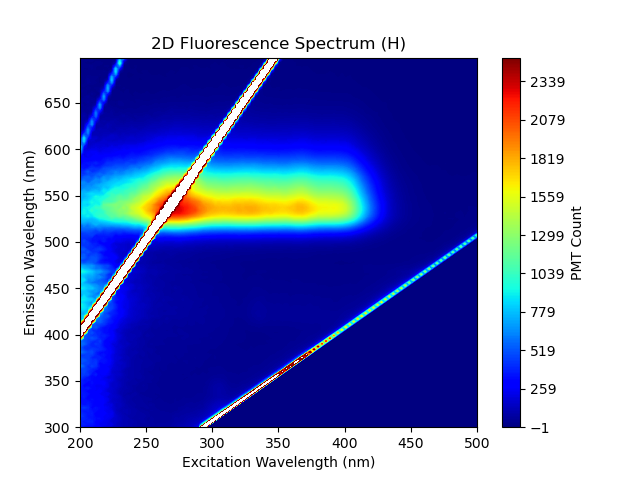

In [8]:
# set plot details

fig, ax = plt.subplots()

ax.set(xlabel='Excitation Wavelength (nm)', 
       ylabel='Emission Wavelength (nm)',
       title= '2D Fluorescence Spectrum (H)')

levels = np.arange(-1, 2500.0, 10.0)

X, Y = np.meshgrid(xs, ms)

im = ax.contourf(X, Y, data, levels=levels, cmap='jet')


fig.colorbar(im, label='PMT Count')

# ax.imshow(data)

